# Image Augmentation in Digit Recognition with numpy for beginners ...

1) Image Augmentation is a techinque to modify the images in order to expand the dataset,<br>
2) Take below image for example of an inverted mountain , human eye will call it a mountain even if it sees from any angle.<br>
3) Similar concept we will apply to image training models by rotating them on different axis .<br>
4) Since it is sometimes hard to get relevant number of images for your model so you would enhance the existing images to increase the training size to improve performance

<img src = "https://images.unsplash.com/photo-1523601690549-b1f89abff70c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1051&q=80" width=500 height=500/>

In [1]:
# Importing the usual libraries and filter warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
# test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

print(train.shape,test.shape)
#In the beginning it's important to check the size of your train and test data which later helps in 
#deciding the sample size while testing your model on train data

(42000, 785) (28000, 784)


In [3]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Lets see if we have a null value in the whole dataset
#Usuall we will check isnull().sum() but here in our dataset we have 784 columns and a groupby won't fit the buffer
print(np.unique([train.isnull().sum()]))
print(np.unique([test.isnull().sum()]))

[0]
[0]


In [6]:
y = train['label']
df_train = train.drop(columns=["label"],axis=1)
print(y.shape,df_train.shape)

(42000,) (42000, 784)


# Visualization
Its quite evident that this is a multiclass classification problem and the target classes are almost uniformly distributed in the dataset having digits from 0-9

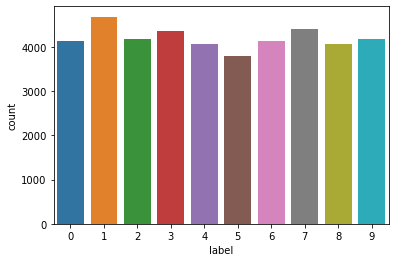

In [7]:
sns.countplot(y)

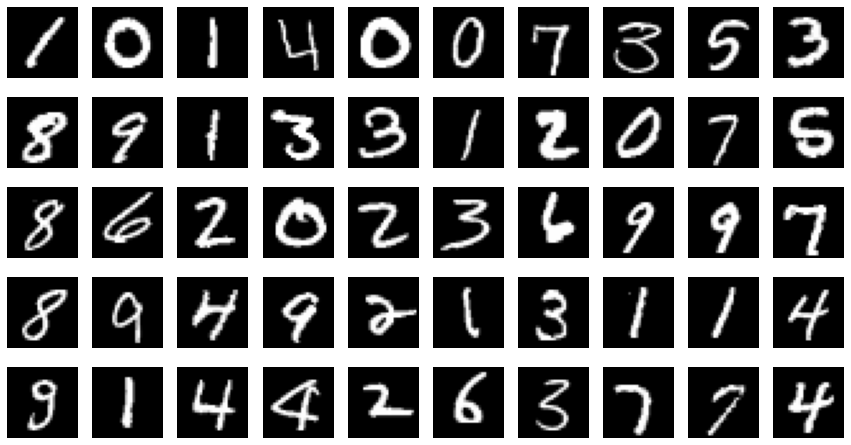

In [8]:
#Lets see the first 50 images of the dataset
df_train_img = df_train.values.reshape(-1,28,28,1)
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(df_train_img[i].reshape((28,28)),cmap='gray')
    plt.axis("off")
plt.show()

# Function for image augmentation

 1. Below function takes the taining set pixels and lables as input
 2. Defines 3 global dataframe variables which will store the images roatated at various angles
 3. For loop rotates an image to various angles using nympy function rot90 and appends to 3 diiferent different lists
 4. Finally 3 dataframes are created just like training set but having inverted images
 5.  Visualize the various datasets
 - [Images rotated by 90 &#176;](#DF1)
 - [Images rotated by 180 &#176;](#DF2)
 - [Images rotated by 270 &#176;](#DF3)

In [9]:
def augment(df_aug,y):
    col_list = df_aug.columns.tolist()
    col_list = ['label']+col_list
    list1=[]
    list2=[]
    list3=[]
    global df1
    global df2
    global df3
    df_train_img = df_aug.values.reshape(-1,28,28,1)
    for i in range(len(df_aug)):
        list1.append([y[i]]+np.rot90(df_train_img[i],1).flatten().tolist())
        list2.append([y[i]]+np.rot90(df_train_img[i],2).flatten().tolist())
        list3.append([y[i]]+np.rot90(df_train_img[i],3).flatten().tolist())
    df1= pd.DataFrame(list1,columns=col_list)
    df2 = pd.DataFrame(list2,columns=col_list)
    df3 = pd.DataFrame(list3,columns=col_list)

In [10]:
#Function is called
augment(df_train,y)

In [11]:
#3 new dataframes are created with same size as tarining set as expected
print(df1.shape,df2.shape,df3.shape)

(42000, 785) (42000, 785) (42000, 785)


<a id='DF1'></a>

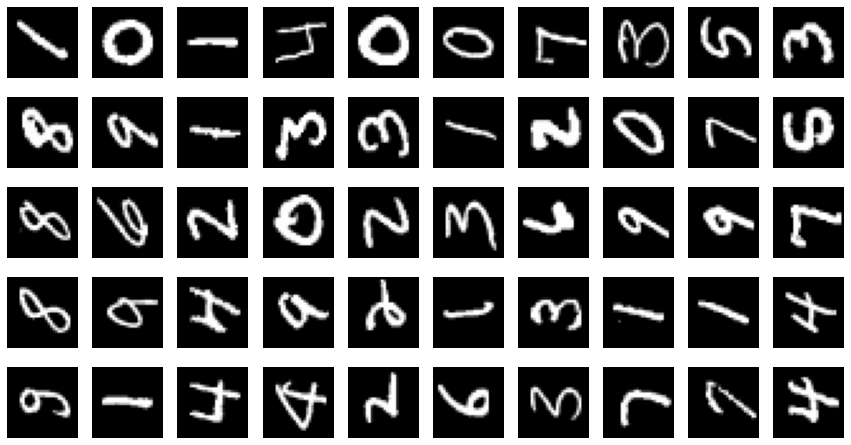

In [12]:
df_train1 = df1.drop(columns=["label"],axis=1)
df_train_img1 = df_train1.values.reshape(-1,28,28,1)
#Lets see the first 50 images of the dataset
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(df_train_img1[i].reshape((28,28)),cmap='gray')
    plt.axis("off")
plt.show()


<a id='DF2'></a>

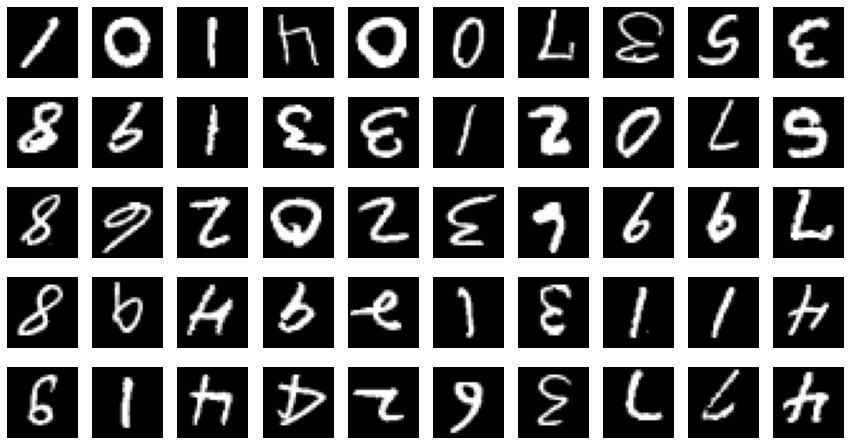

In [13]:
df_train2 = df2.drop(columns=["label"],axis=1)
df_train_img2 = df_train2.values.reshape(-1,28,28,1)
#Lets see the first 50 images of the dataset
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(df_train_img2[i].reshape((28,28)),cmap='gray')
    plt.axis("off")
plt.show()


<a id='DF3'></a>

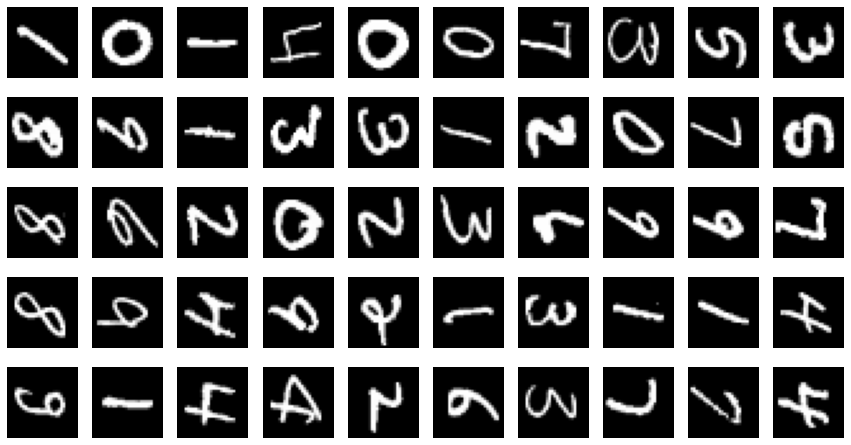

In [14]:
df_train3 = df3.drop(columns=["label"],axis=1)
df_train_img3 = df_train3.values.reshape(-1,28,28,1)
#Lets see the first 50 images of the dataset
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(df_train_img3[i].reshape((28,28)),cmap='gray')
    plt.axis("off")
plt.show()


In [15]:
#Lets merge all the dataframes
#frames = [train,df1,df2,df3]
frames = [train,df1,df3]
final_df = pd.concat(frames)
final_df.shape

(126000, 785)

In [16]:
y = final_df['label']
df_train = final_df.drop(columns=["label"],axis=1)
print(y.shape,df_train.shape)

(126000,) (126000, 784)


In [17]:
# Normalize the dataset
df_train = df_train / 255
test = test / 255

In [18]:
#Looks like the values are equally distributed in the dataset
y.value_counts()

1    14052
7    13203
3    13053
9    12564
2    12531
6    12411
0    12396
4    12216
8    12189
5    11385
Name: label, dtype: int64

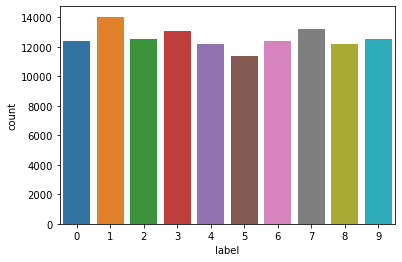

In [19]:
sns.countplot(y)

In [20]:
# Loading the usual libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
seed = 2
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(df_train,y, test_size = test_size , random_state = seed)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(88200, 784) (37800, 784) (88200,) (37800,)


In [22]:
#KNN

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)


Accuracy: 0.950582


In [23]:

y_pred_test = knn.predict(test)

In [24]:
submission = pd.DataFrame({"ImageId": list(range(1, len(y_pred_test)+1)),"Label": y_pred_test})

submission.to_csv("submission_digit1.csv", index=False)